In [32]:
import csv
import numpy as np
import pandas as pd


In [53]:
df=pd.read_csv("OnlineRetail.csv")
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### 1) Find mean, std dev, min , max of unitprice field.

In [34]:
mean = df['UnitPrice'].mean()
max_value = df['UnitPrice'].max()
min_value = df['UnitPrice'].min()
std = df['UnitPrice'].std() 
print("Mean of UnitPrice field:",mean)
print("Standard deviation of UnitPrice field:",std)
print("Maximum value of UnitPrice field:",max_value)
print("Minimum value of UnitPrice field:",min_value)


Mean of UnitPrice field: 4.611113626088513
Standard deviation of UnitPrice field: 96.75985306117938
Maximum value of UnitPrice field: 38970.0
Minimum value of UnitPrice field: -11062.06


### 2) Draw histogram of unitprice field using matplotlib

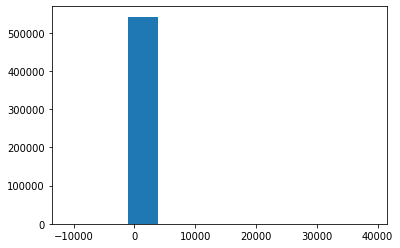

In [35]:
import matplotlib.pyplot as plt
x = df['UnitPrice']
plt.hist(x)
plt.show()

### 3) Find mean of unitprice group by country and plot them 

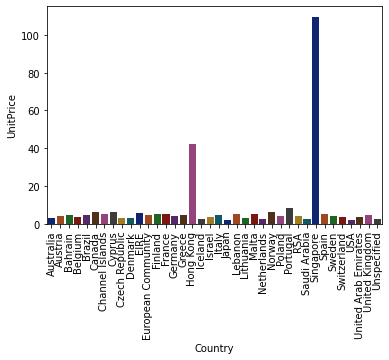

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt 

grouped_df=df.groupby('Country')
mean_df = grouped_df.mean()
mean_df
ax = sns.barplot(x =mean_df.index[:], y = mean_df['UnitPrice'][:], palette = 'dark')
plt.xticks(rotation = 90)
plt.show()

###  4) Find min and max of unit price group by customerID

In [48]:
group_df=df.groupby('CustomerID')
res_df=group_df.mean();
temp_df=res_df.reset_index()
temp_df




,CustomerID,Quantity,UnitPrice,TotalPrice
0,12346.0,0.000000,1.040000,0.000000
1,12347.0,13.505495,2.644011,23.681319
2,12348.0,75.516129,5.764839,57.975484
3,12349.0,8.643836,8.289041,24.076027
4,12350.0,11.588235,3.841176,19.670588
...,...,...,...,...
4367,18280.0,4.500000,4.765000,18.060000
4368,18281.0,7.714286,5.622857,11.545714
4369,18282.0,7.538462,4.821538,13.584615
4370,18283.0,1.847884,1.614987,2.771005


In [49]:
print("Minimum of UnitPrice:",temp_df['UnitPrice'].min())
print("Maximum of UnitPrice:",temp_df['UnitPrice'].max())

Minimum of UnitPrice: 0.0
Maximum of UnitPrice: 8055.779999999999


### 5) Find cumulative sales monthly and yearly and plot them

In [39]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%m/%d/%Y %H:%M')

In [40]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [41]:
TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=6,column = 'TotalPrice', value=TotalAmount)

In [42]:
df.head()
new_df = df.copy()

In [43]:
new_df['Year'] = pd.DatetimeIndex(new_df['InvoiceDate']).year
new_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,TotalPrice,CustomerID,Country,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom,2010


<AxesSubplot:title={'center':'Year wise sale'}, xlabel='Year', ylabel='Sales(in 10^6)'>

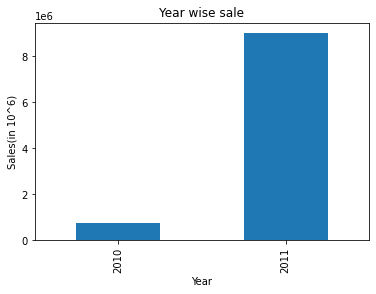

In [50]:
new_df.groupby('Year')['TotalPrice'].sum().plot(kind='bar',title="Year wise sale",xlabel="Year",ylabel="Sales(in 10^6)")

<AxesSubplot:title={'center':'Month Wise Sale'}, xlabel='Month', ylabel='Sale(in 10^6)'>

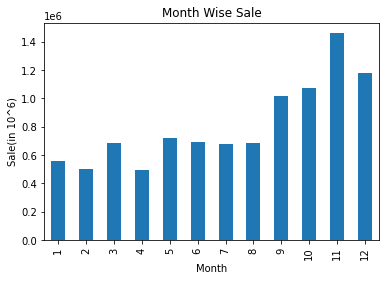

In [51]:
new_df['Mon'] = pd.DatetimeIndex(new_df['InvoiceDate']).month
new_df['month'] = pd.DatetimeIndex(new_df['InvoiceDate']).month_name
new_df.groupby(['Mon'])['TotalPrice'].sum().plot(kind='bar', title = 'Month Wise Sale',xlabel="Month",ylabel="Sale(in 10^6)") 